### Description
Estimate the value of houses in Ames, Iowa, using 79 explanatory variables. The dataset is fairly small, with only 1460 training samples. The 79 features in the dataset are a mix of categorical and numerical features, and leave a lot of room for feature engineering.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#hallo dit is een test!!

In [2]:
data = pd.read_csv('data/AmesHousing.csv')

data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### OVERVIEW

There are multiple types of variables. Integers, floats, strings, NaN's. Use df.info() to gain detailed insight.


In [3]:
# show information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

There are 2930 entries, numbered 0 to 2929, with **81 different features**. The **target feature* is 'SalePrice'. 

Out of all the columns there are several that have missing values. For instance, 'Alley', 'Pool QC', 'Fence', and 'Misc Feature'. These need to be fixed. 

### Step 1: Clean the data

In [4]:
# remove irrelevant or uniquely identifying features
clean_data = data.drop(['Order', 'PID'], axis=1)

clean_data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
# get overview of missing values
clean_data.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
clean_data.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

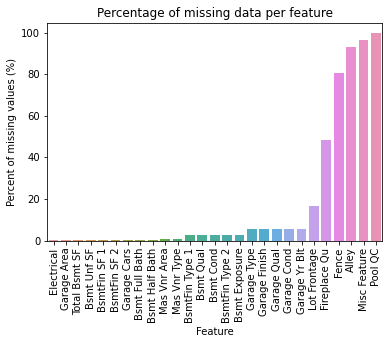

Electrical         0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Garage Cars        0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Finish      5.426621
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

In [7]:
def missing_data(df):
    ''' Calculates and returns the percentage of missing data per feature. '''
    percentage = 100 * df.isnull().sum() / len(df)
    
    # sort in ascending order
    return percentage[percentage > 0].sort_values()

percent_missing_data = missing_data(clean_data)

sns.barplot(x = percent_missing_data.index, y = percent_missing_data)
plt.title('Percentage of missing data per feature')
plt.xlabel('Feature')
plt.ylabel('Percent of missing values (%)')
plt.xticks(rotation = 90)
plt.show()
    
percent_missing_data

### Chosing how to deal with missing values

There are the following options:

1. You can delete each row (sample) that contains a missing value
2. You can delete the whole column (feature) containing the missing values
3. You can replace the missing values with some other value




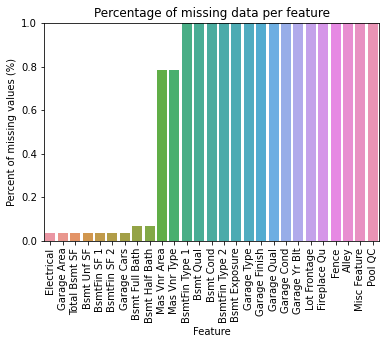

In [8]:
# 1: check which rows to drop, depending on a treshold of 1%
sns.barplot(x = percent_missing_data.index, y = percent_missing_data)
plt.xticks(rotation = 90)

# zoom in on the threshold percentage of 1
plt.ylim(0 , 1)

# set labels
plt.title('Percentage of missing data per feature')
plt.xlabel('Feature')
plt.ylabel('Percent of missing values (%)')
plt.show()

In [9]:
# create list of the features were less than 1% of the values are missing
drop_rows = percent_missing_data[percent_missing_data <= 1]
drop_rows = drop_rows.index.tolist()

# remove a the samples with missing values for each of those features 
clean_data = clean_data.dropna(axis = 'index', subset = drop_rows)
display(clean_data)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [10]:
# select the features with more than 20% data missing
drop_features = percent_missing_data[percent_missing_data >= 20]
drop_features = drop_features.index.tolist()

# remove those features
clean_data = clean_data.drop(drop_features, axis = 1)
display(clean_data)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [11]:
# select discussable values
discuss_features = percent_missing_data[np.logical_and(percent_missing_data > 1, percent_missing_data < 20)]
discuss_features = discuss_features.index.tolist()


# check type of data 
for feature in discuss_features:
    print(feature, clean_data[feature].unique())

BsmtFin Type 1 ['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ' nan]
Bsmt Qual ['TA' 'Gd' 'Ex' nan 'Fa' 'Po']
Bsmt Cond ['Gd' 'TA' nan 'Po' 'Fa' 'Ex']
BsmtFin Type 2 ['Unf' 'LwQ' 'BLQ' 'Rec' nan 'GLQ' 'ALQ']
Bsmt Exposure ['Gd' 'No' 'Mn' 'Av' nan]
Garage Type ['Attchd' 'BuiltIn' 'Basment' 'Detchd' nan 'CarPort' '2Types']
Garage Finish ['Fin' 'Unf' 'RFn' nan]
Garage Qual ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
Garage Cond ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
Garage Yr Blt [1960. 1961. 1958. 1968. 1997. 1998. 2001. 1992. 1995. 1999. 1993. 1990.
 1985. 2003. 1988. 2010. 1951. 1978. 1977. 1974. 2000. 1970. 1971.   nan
 1975. 2009. 2008. 2005. 2004. 2002. 2006. 1996. 1994. 1980. 1979. 1984.
 1986. 1920. 1987. 1973. 1963. 1962. 1976. 1967. 1972. 1966. 1964. 1950.
 1949. 1954. 1955. 1959. 1957. 1956. 1952. 1953. 1989. 1948. 1900. 1927.
 1915. 1945. 1940. 1938. 1928. 1930. 1926. 1939. 1942. 1923. 1917. 1910.
 1965. 1969. 1947. 1946. 1941. 1924. 1922. 1896. 2007. 1983. 1981. 1991.
 1982. 1916. 1925. 1936. 1935. 1931. 193

#### Replace missing values 
Replace the missing values for categorical data with 'none'
Replace the missing values for numerical data with the average value of that feature

In [12]:
# replace missing values
for feature in discuss_features:
    
    if type(clean_data[feature][0]) == str:
        clean_data[feature] = clean_data[feature].fillna('None')
        
    else: 
        clean_data[feature] = clean_data[feature].fillna(clean_data[feature].mean())
        
# check if all missing values are replaced
clean_data.info()
        
        
        

        
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2903 non-null   int64  
 1   MS Zoning        2903 non-null   object 
 2   Lot Frontage     2903 non-null   float64
 3   Lot Area         2903 non-null   int64  
 4   Street           2903 non-null   object 
 5   Lot Shape        2903 non-null   object 
 6   Land Contour     2903 non-null   object 
 7   Utilities        2903 non-null   object 
 8   Lot Config       2903 non-null   object 
 9   Land Slope       2903 non-null   object 
 10  Neighborhood     2903 non-null   object 
 11  Condition 1      2903 non-null   object 
 12  Condition 2      2903 non-null   object 
 13  Bldg Type        2903 non-null   object 
 14  House Style      2903 non-null   object 
 15  Overall Qual     2903 non-null   int64  
 16  Overall Cond     2903 non-null   int64  
 17  Year Built    

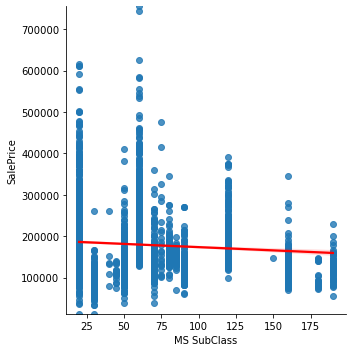

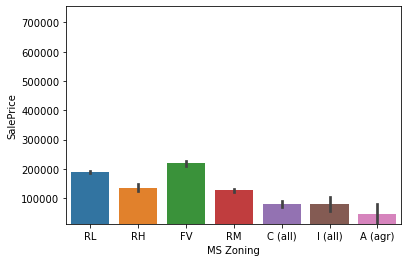

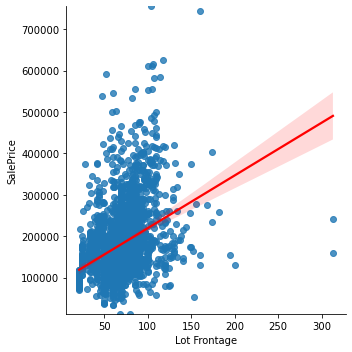

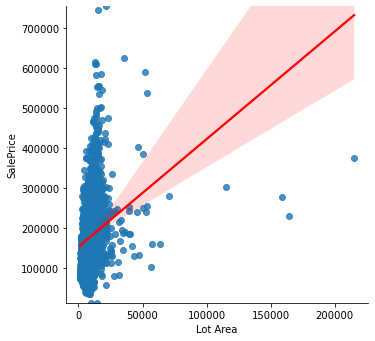

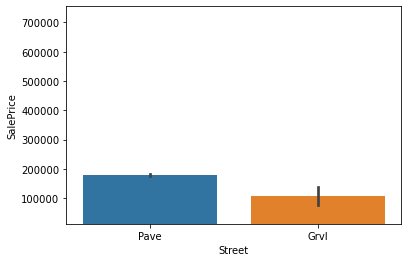

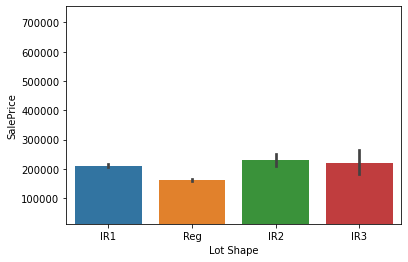

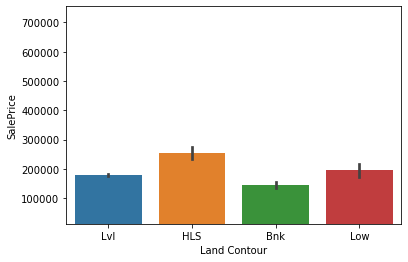

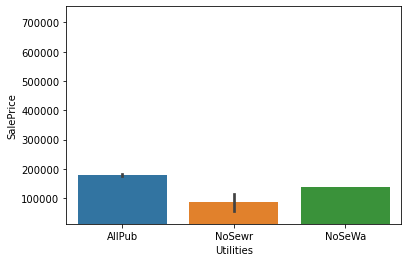

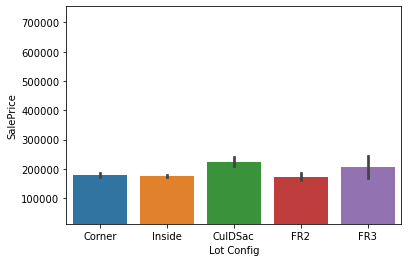

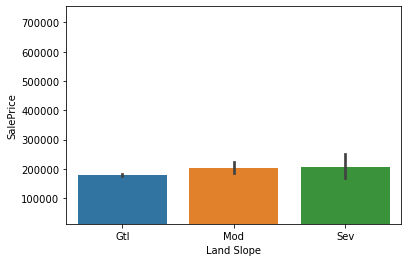

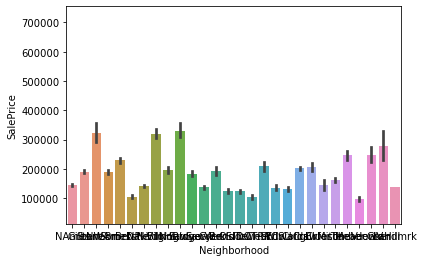

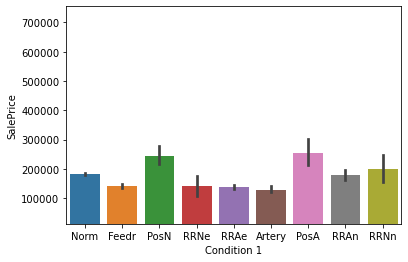

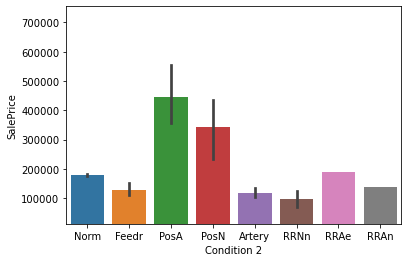

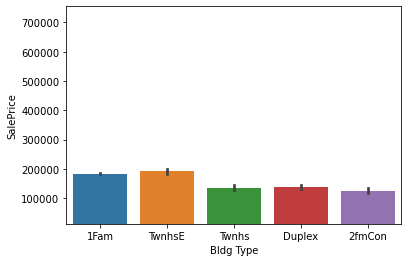

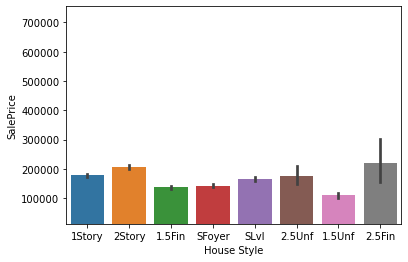

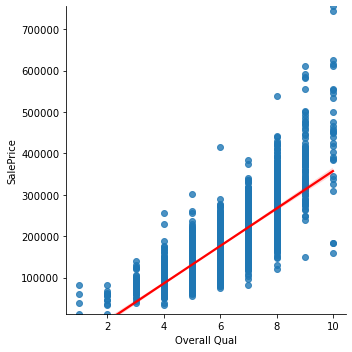

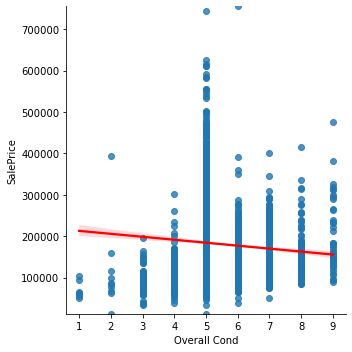

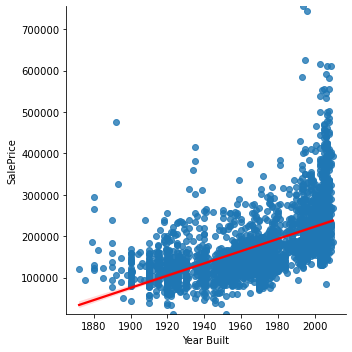

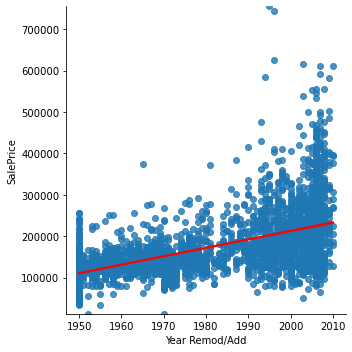

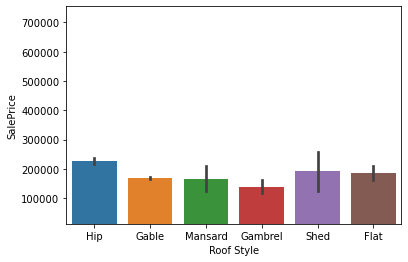

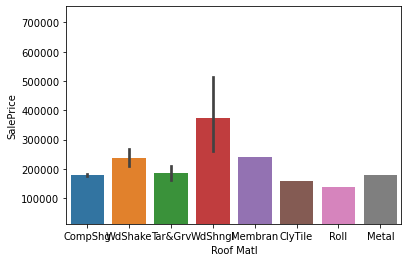

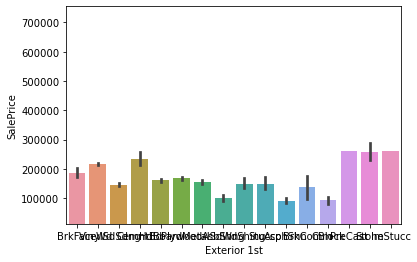

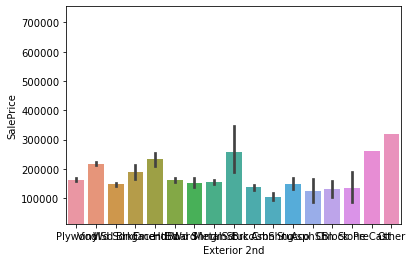

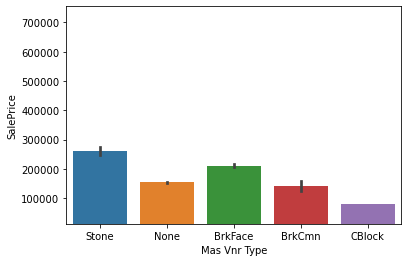

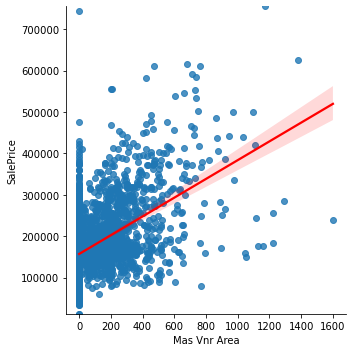

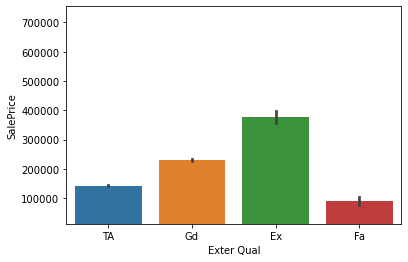

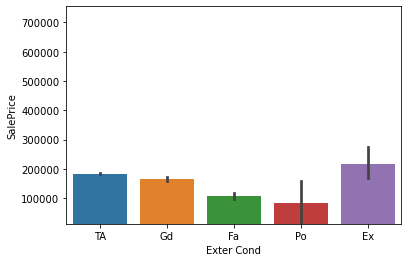

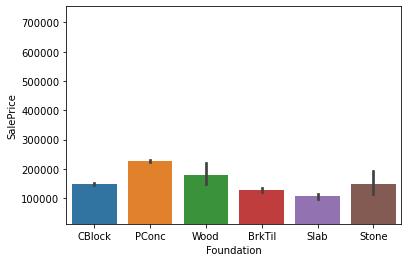

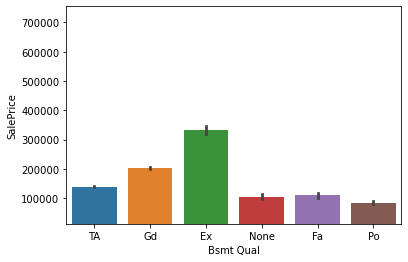

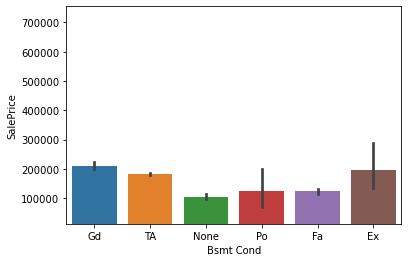

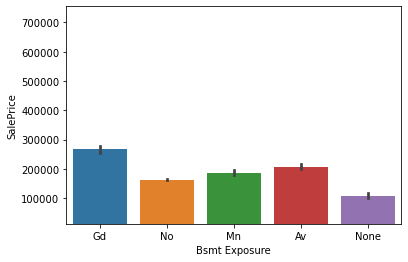

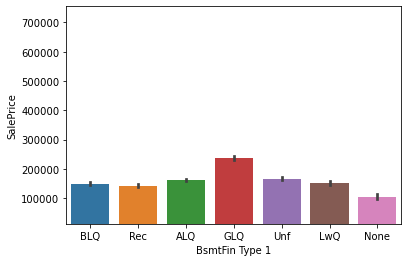

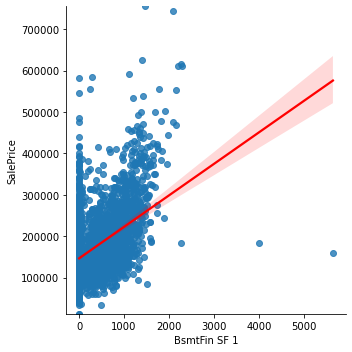

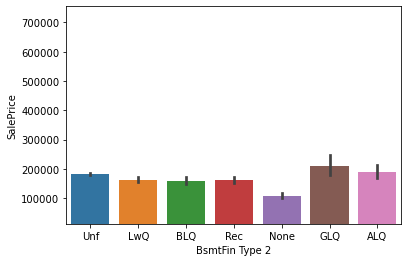

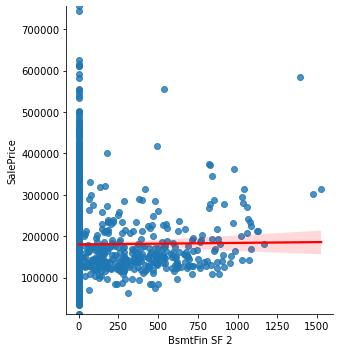

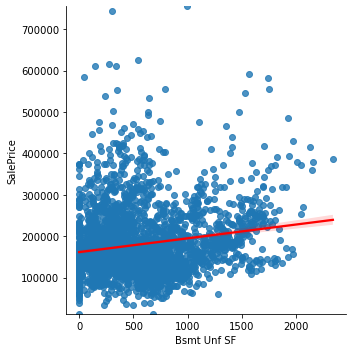

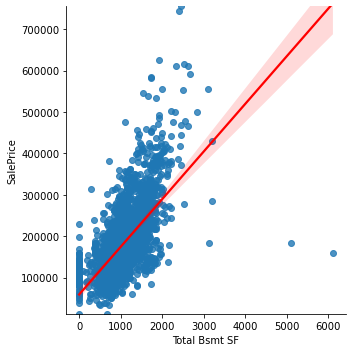

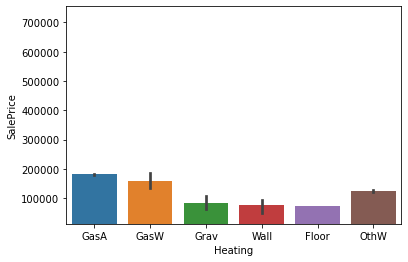

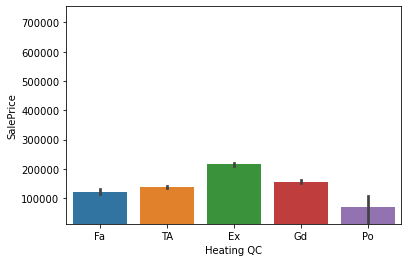

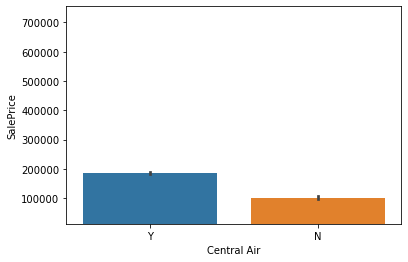

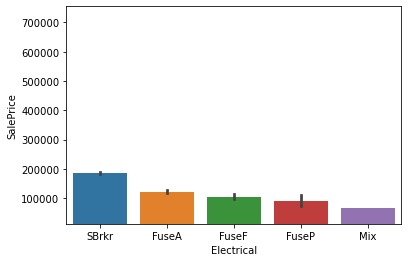

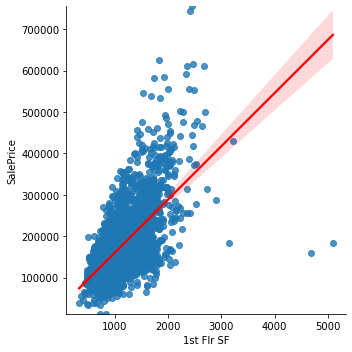

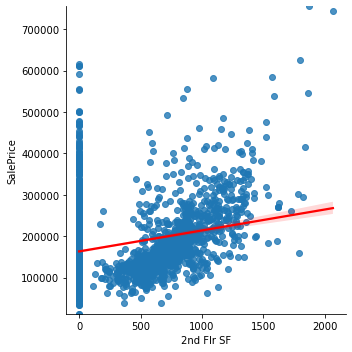

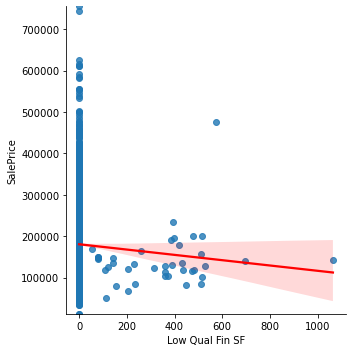

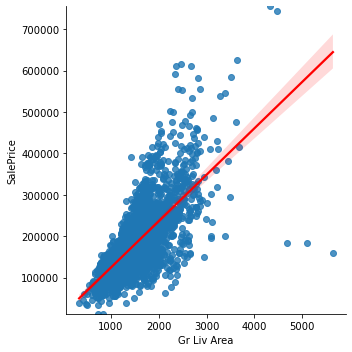

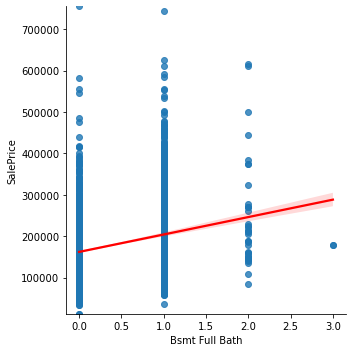

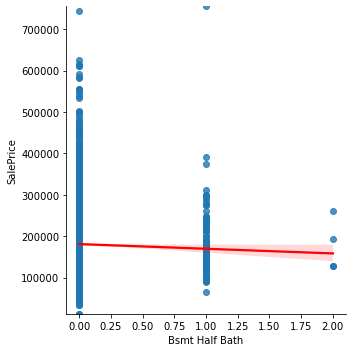

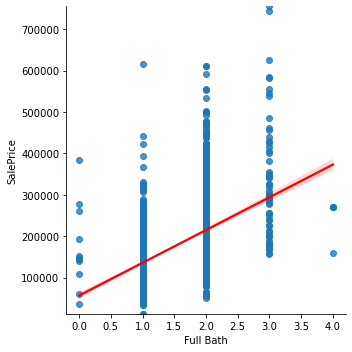

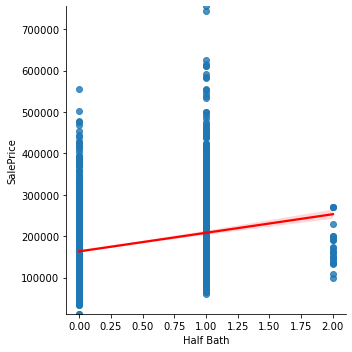

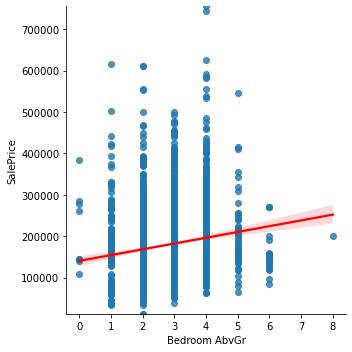

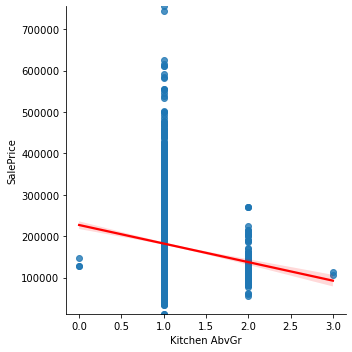

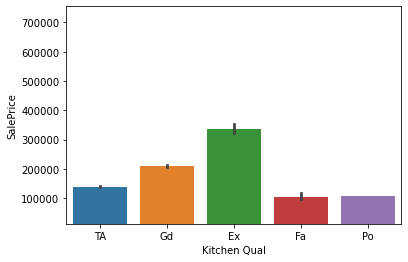

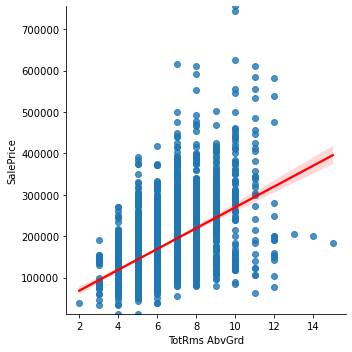

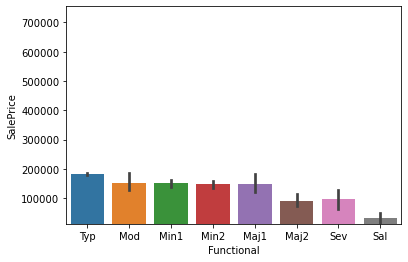

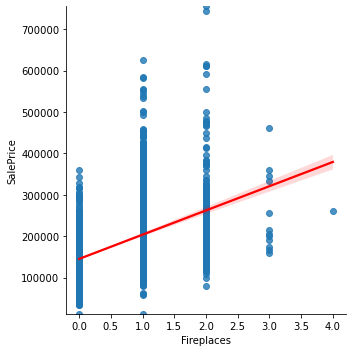

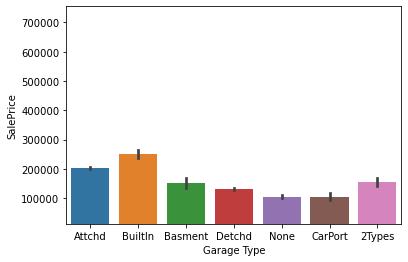

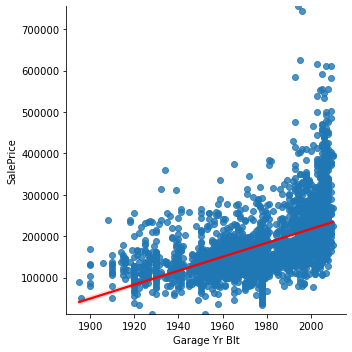

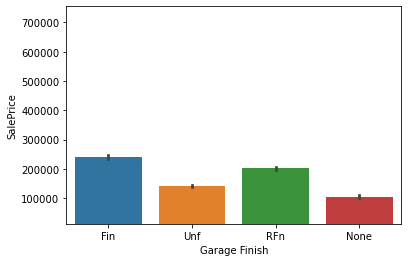

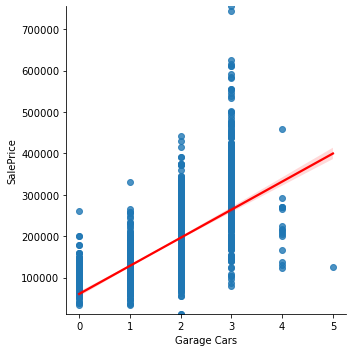

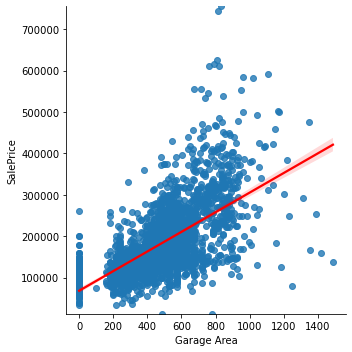

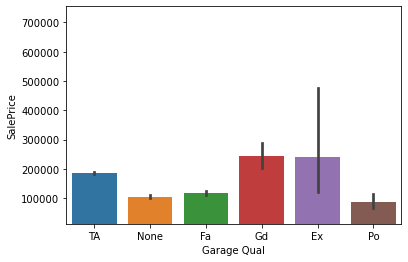

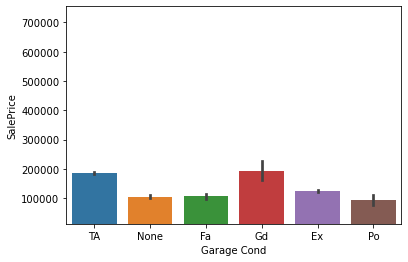

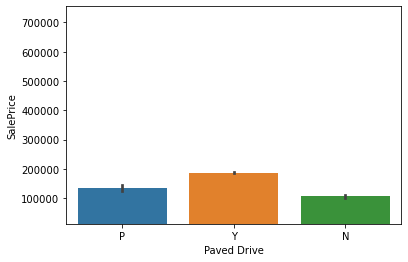

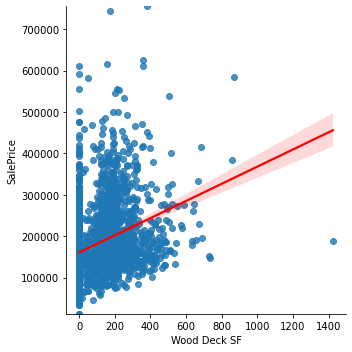

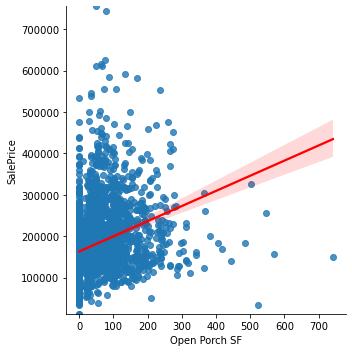

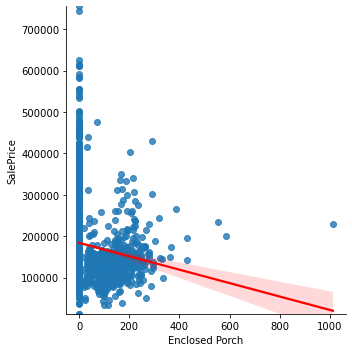

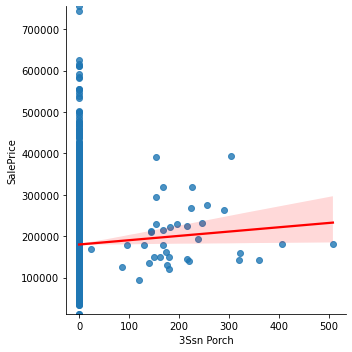

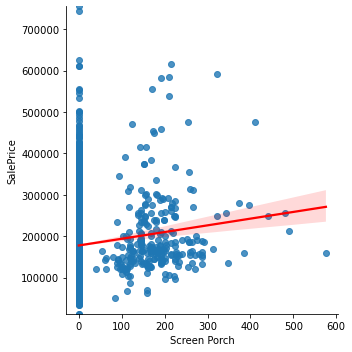

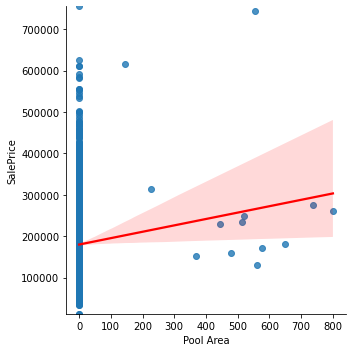

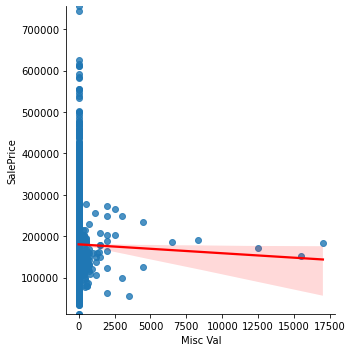

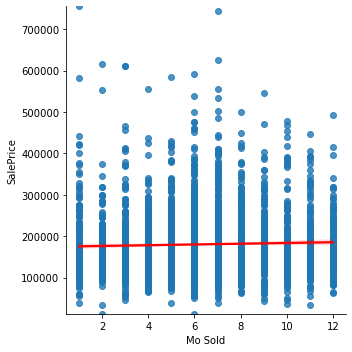

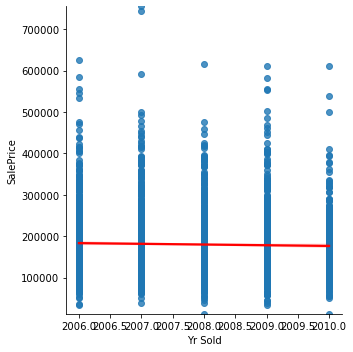

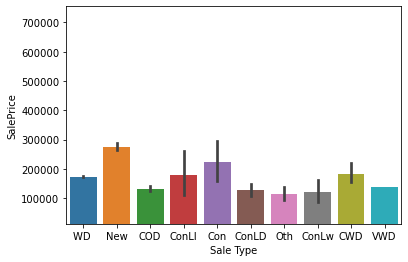

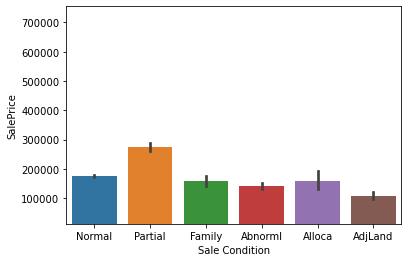

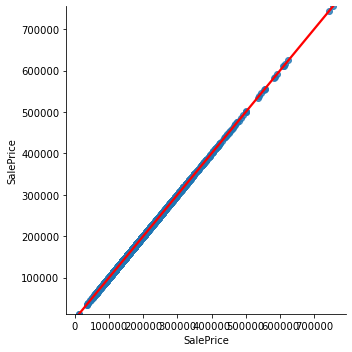

In [13]:
max_price = clean_data['SalePrice'].max()
min_price = clean_data['SalePrice'].min()

for feature in clean_data:
    if type(clean_data[feature][0]) == str:
        sns.barplot(x = feature, y = 'SalePrice', data = clean_data)
        
    else:
        #print(clean_data[feature].corr()['SalePrice'])
        sns.lmplot(x = feature, y = 'SalePrice', data = clean_data, line_kws={'color': 'red'})
    plt.ylim(min_price, max_price)
    plt.show()
        


The values were considered like this

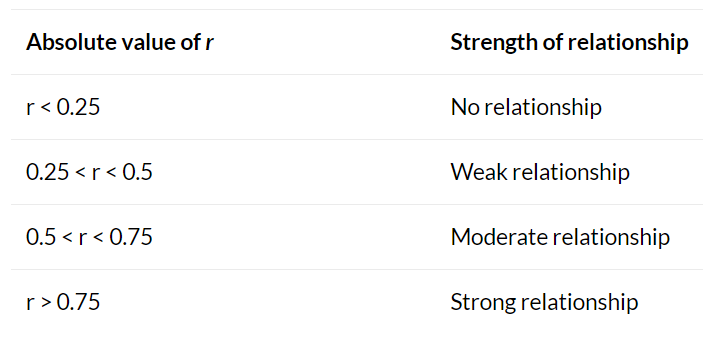



We will look at the correlation between the features and sales price.

Then we will look whether the features are correlated to other features. When the correlation is higher than 0.9, only one of the two features will be used.

In [14]:

correlations = abs(clean_data.corr()['SalePrice'].sort_values())

strong_cor = correlations[correlations > 0.75] # features with strong correlations
moderate_cor = correlations[np.logical_and(correlations < 0.75, correlations > 0.5)]
weak_cor = correlations[correlations < 0.25]

print(f'These features have a weak correlation to selling price\n {weak_cor}')
print(f'These features have a strong correlation to selling price\n{strong_cor}')
print(f'These features have a moderate correlation to selling price\n{moderate_cor} ')

print(['BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 2', 'Bsmt Exposure', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Yr Blt', 'Lot Frontage'])

useful_correlations = correlations[correlations > 0.5].index

These features have a weak correlation to selling price
 Enclosed Porch     0.130235
Kitchen AbvGr      0.120268
Overall Cond       0.099796
MS SubClass        0.083610
Low Qual Fin SF    0.037359
Bsmt Half Bath     0.034763
Yr Sold            0.027831
Misc Val           0.015326
BsmtFin SF 2       0.008022
Mo Sold            0.030556
3Ssn Porch         0.032927
Pool Area          0.069103
Screen Porch       0.114262
Bedroom AbvGr      0.144928
Bsmt Unf SF        0.183368
Name: SalePrice, dtype: float64
These features have a strong correlation to selling price
Overall Qual    0.799121
SalePrice       1.000000
Name: SalePrice, dtype: float64
These features have a moderate correlation to selling price
Mas Vnr Area      0.508606
Garage Yr Blt     0.514897
Year Remod/Add    0.532265
Full Bath         0.546100
Year Built        0.558468
1st Flr SF        0.625499
Total Bsmt SF     0.634647
Garage Area       0.639161
Garage Cars       0.647001
Gr Liv Area       0.708248
Name: SalePrice, dtyp

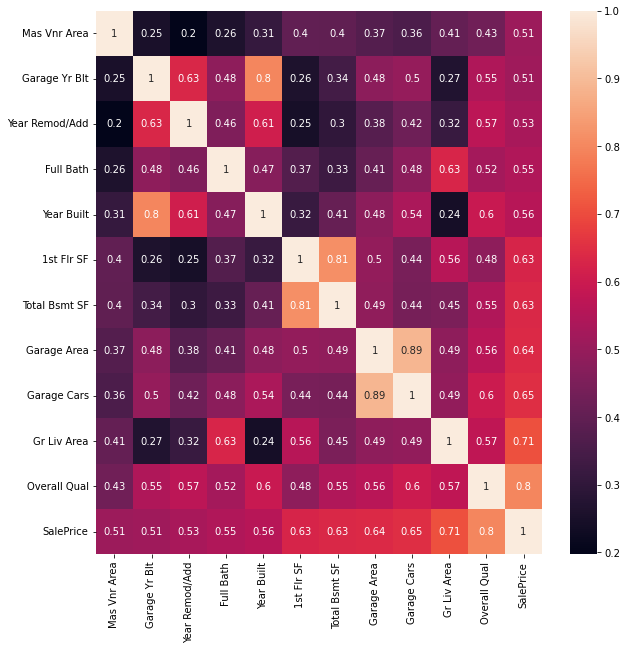

In [15]:
# create heatmap
correlation_features = clean_data[useful_correlations].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_features, annot = True)

plt.show()

As seen above, none of the features hold a correlation of 0.9 or higher with eachother. Therefore, all of the features will be selected

In [23]:
num_data = clean_data[useful_correlations]

display(num_data)

,Mas Vnr Area,Garage Yr Blt,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
0,112.0,1960.000000,1960,1,1960,1656,1080.0,528.0,2.0,1656,6,215000
1,0.0,1961.000000,1961,1,1961,896,882.0,730.0,1.0,896,5,105000
2,108.0,1958.000000,1958,1,1958,1329,1329.0,312.0,1.0,1329,6,172000
3,0.0,1968.000000,1968,2,1968,2110,2110.0,522.0,2.0,2110,7,244000
4,0.0,1997.000000,1998,2,1997,928,928.0,482.0,2.0,1629,5,189900
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.0,1984.000000,1984,1,1984,1003,1003.0,588.0,2.0,1003,6,142500
2926,0.0,1983.000000,1983,1,1983,902,864.0,484.0,2.0,902,5,131000
2927,0.0,1977.863438,1992,1,1992,970,912.0,0.0,0.0,970,5,132000
2928,0.0,1975.000000,1975,1,1974,1389,1389.0,418.0,2.0,1389,5,170000


In [25]:
cat_data = clean_data.select_dtypes(include='object')
display(cat_data)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,None,None,None,None,Y,WD,Normal
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


# First model: multivariate regression with nummerical data

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split()